**Вызов библиотек**

In [38]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import random
from statistics import mean

**Загрузка и подготовка изображений**

In [39]:
img1 = cv2.imread("moe/1.jpg")
img2 = cv2.imread("moe/2.jpg")
img3 = cv2.imread("moe/3.jpg")
img4 = cv2.imread("moe/4.jpg")
img5 = cv2.imread("moe/5.jpg")
img6 = cv2.imread("moe/6.jpg")
img7 = cv2.imread("moe/7.jpg")
img8 = cv2.imread("moe/8.jpg")

img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img_gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
img_gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
img_gray6 = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)
img_gray7 = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)
img_gray8 = cv2.cvtColor(img8, cv2.COLOR_BGR2GRAY)

width = int(img_gray1.shape[0]/6)
height =  int((img_gray1.shape[1] - 1)/6)
dsize = (height,width)

img_gray1 = cv2.resize(img_gray1, dsize)
img_gray2 = cv2.resize(img_gray2, dsize)
img_gray3 = cv2.resize(img_gray3, dsize)
img_gray4 = cv2.resize(img_gray4, dsize)
img_gray5 = cv2.resize(img_gray5, dsize)
img_gray6 = cv2.resize(img_gray6, dsize)
img_gray7 = cv2.resize(img_gray7, dsize)
img_gray8 = cv2.resize(img_gray8, dsize)

**Функция детектора углов Харриса и функция обозначения их на изображении**

In [40]:
def harrys(image):
    nCorners = 15 #15 cornet
    windowSize = 21 #15 23
    corners = []  
    gauss_img = cv2.GaussianBlur(image, (5,5),3)
    window = np.ones(([windowSize,windowSize]))
    ksize = 5
    #dy,dx = np.gradient(gauss_img)
    dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize, cv2.BORDER_REPLICATE)
    dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize, cv2.BORDER_REPLICATE)
    c_xx = cv2.GaussianBlur(dx**2,(windowSize,windowSize),2)
    c_xy = cv2.GaussianBlur(dy*dx,(windowSize,windowSize),2)
    c_yy = cv2.GaussianBlur(dy**2,(windowSize,windowSize),2)
    e = np.zeros((gauss_img.shape))
    for i in range(gauss_img.shape[0]):
        for j in range(gauss_img.shape[1]):
            c = np.array([[c_xx[i][j], c_xy[i][j]], [c_xy[i][j], c_yy[i][j]]])
            trM = c_xx[i][j] + c_yy[i][j]
            detM = np.linalg.det(c)
            e[i][j] = 0.08*(trM**2) + detM
    #local maximum
    start = int((windowSize-1)/2)
    result = np.zeros((e.shape))
    corner = dict()
    for i in range(start, e.shape[0]-start):
        for j in range(start,e.shape[1]-start):
            x = e[i-start:i+start+1,j-start:j+start+1]
            if (e[i][j] == np.max(x)):
                corner[e[i][j]] = [j,i]
    #local maximum
    for key in sorted(corner.keys(),reverse=True):
        corners.append(corner[key])
    return np.array(corners[0:nCorners])
   
def otrisovka_uglov(ugli, img_gray):
        fig = plt.figure(figsize=(15, 15))
        ax1 = fig.add_subplot(121)
        ax1.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
        ax1.scatter(ugli[:, 0], ugli[:, 1], s=20, edgecolors='b', facecolors='b')




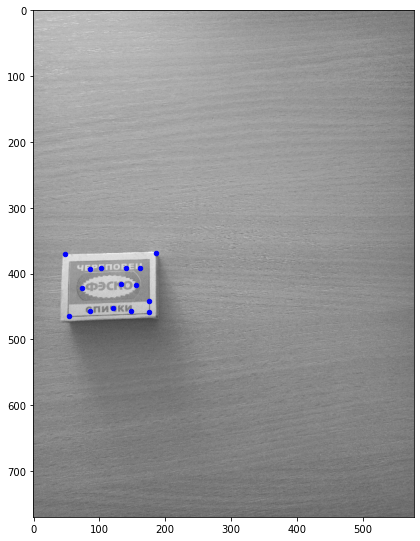

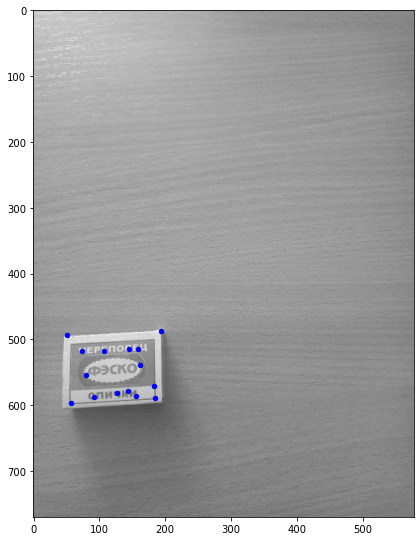

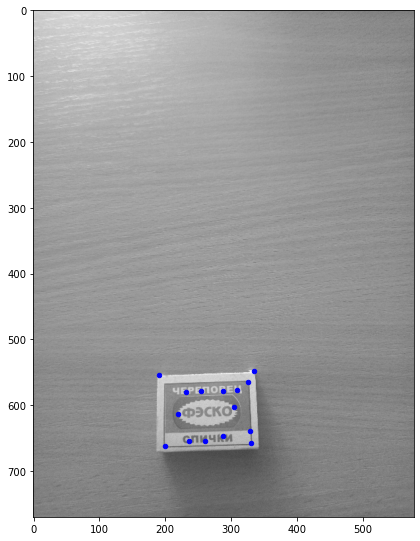

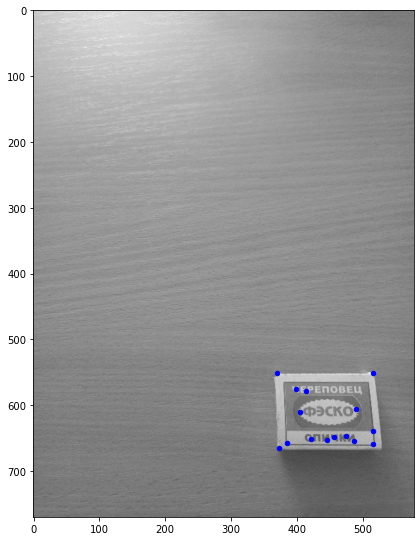

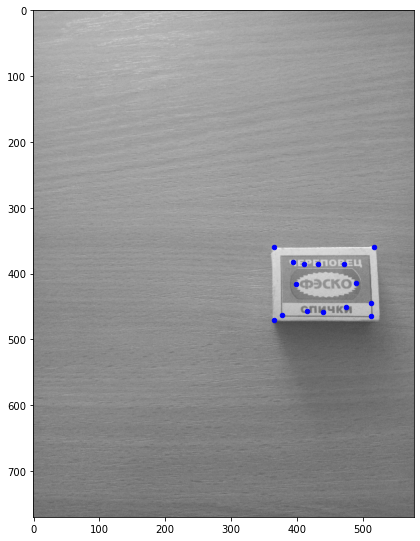

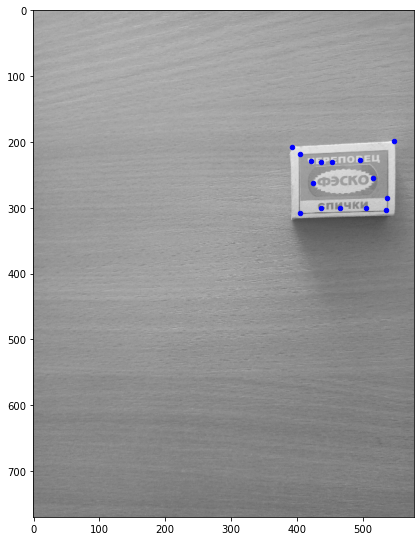

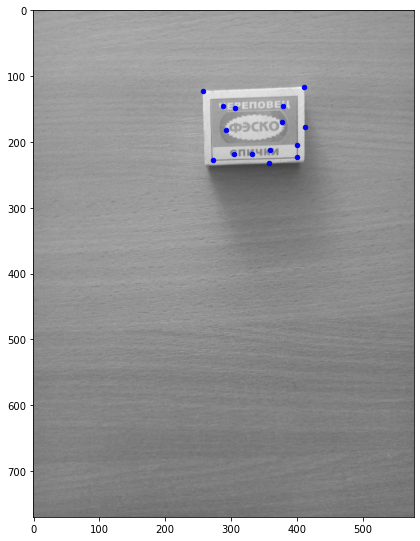

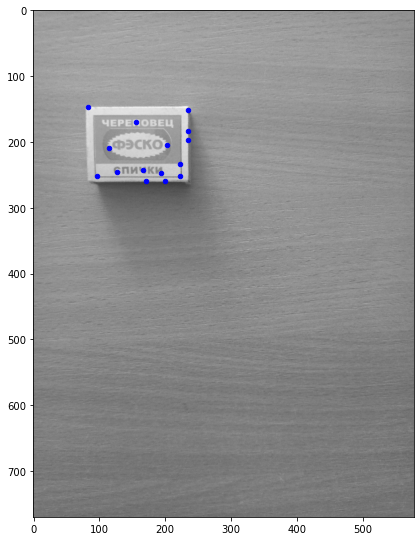

In [ ]:
ugli1 = harrys(img_gray1)
ugli2 = harrys(img_gray2)
ugli3 = harrys(img_gray3)
ugli4 = harrys(img_gray4)
ugli5 = harrys(img_gray5)
ugli6 = harrys(img_gray6)
ugli7 = harrys(img_gray7)
ugli8 = harrys(img_gray8)

otrisovka_uglov(ugli1,img_gray1)
otrisovka_uglov(ugli2,img_gray2)
otrisovka_uglov(ugli3,img_gray3)
otrisovka_uglov(ugli4,img_gray4)
otrisovka_uglov(ugli5,img_gray5)
otrisovka_uglov(ugli6,img_gray6)
otrisovka_uglov(ugli7,img_gray7)
otrisovka_uglov(ugli8,img_gray8)


**Функция поиска одинаковых точек на двух изображениях**

In [52]:
def sravnenie(img1, img2, ugli1, ugli2):
    R = 9 #15  7
    koef = 0.70 #71  0.3
    srav = []
    ncc = np.zeros([ugli1.shape[0], ugli2.shape[0]])
    for i in range(ugli1.shape[0]):
        for j in range(ugli2.shape[0]):
            ncc[i][j] = sravnenie_izobr(img1, img2, ugli1[i], ugli2[j], R)
            if ncc[i][j] > koef:
                srav.append((ugli1[i], ugli2[j]))
    return srav

srav12 = sravnenie(img_gray1, img_gray2, ugli1, ugli2)
srav23 = sravnenie(img_gray2, img_gray3, ugli2, ugli3)
srav34 = sravnenie(img_gray3, img_gray4, ugli3, ugli4)
srav45 = sravnenie(img_gray4, img_gray5, ugli4, ugli5)
srav56 = sravnenie(img_gray5, img_gray6, ugli5, ugli6)
srav67 = sravnenie(img_gray6, img_gray7, ugli6, ugli7)
srav78 = sravnenie(img_gray7, img_gray8, ugli7, ugli8)




**Построение траетории перемещения изоражения**

In [53]:
def usrednenie(matching):
    mas_x_0 = []
    mas_x_1 = []
    mas_y_0 = []
    mas_y_1 = []
    for i in range(len(matching)):
        mas_x_0.append(matching[i][0][0])
        mas_x_1.append(matching[i][0][1])
        mas_y_0.append(matching[i][1][0])
        mas_y_1.append(matching[i][1][1])
    cx = (mean(mas_x_0), mean(mas_x_1))
    cy = (mean(mas_y_0), mean(mas_y_1))
    return cx, cy

x12, y12  = usrednenie(srav12)
x23, y23  = usrednenie(srav23)
x34, y34  = usrednenie(srav34)
x45, y45  = usrednenie(srav45)
x56, y56  = usrednenie(srav56)
x67, y67  = usrednenie(srav67)
x78, y78  = usrednenie(srav78)


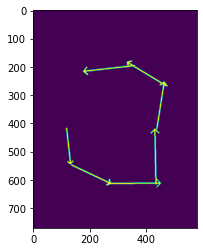

In [54]:
img = np.zeros((img_gray1.shape))
img = cv2.arrowedLine(img, x12, y12, (106,13,173), 3)
img = cv2.arrowedLine(img, x23, y23, (106,13,173), 3)
img = cv2.arrowedLine(img, x34, y34, (106,13,173), 3)
img = cv2.arrowedLine(img, x45, y45, (106,13,173), 3)
img = cv2.arrowedLine(img, x56, y56, (106,13,173), 3)
img = cv2.arrowedLine(img, x67, y67, (106,13,173), 3)
img = cv2.arrowedLine(img, x78, y78, (106,13,173), 3)

plt.imshow(img)
